<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/deaths_and_causes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/deaths_and_causes_synthetic.csv")
data.head(2)

,Year,Country,Gender,Age_Group,Cause_of_Death,Number_of_Deaths,Mortality_Rate_per_1000
0,2022,India,Male,0-14,Natural Disasters,73272,2.79
1,2025,Germany,Female,0-14,Homicide,421169,0.71


In [3]:
data.shape

(260, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     260 non-null    int64  
 1   Country                  260 non-null    object 
 2   Gender                   260 non-null    object 
 3   Age_Group                260 non-null    object 
 4   Cause_of_Death           260 non-null    object 
 5   Number_of_Deaths         260 non-null    int64  
 6   Mortality_Rate_per_1000  260 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.3+ KB


In [5]:
data.isnull().sum()

,0
Year,0
Country,0
Gender,0
Age_Group,0
Cause_of_Death,0
Number_of_Deaths,0
Mortality_Rate_per_1000,0


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.describe()

,Year,Number_of_Deaths,Mortality_Rate_per_1000
count,260.000000,260.000000,260.000000
mean,2020.126923,257694.530769,5.956654
std,3.187095,149809.426503,3.418219
min,2015.000000,4275.000000,0.190000
25%,2018.000000,113526.500000,2.912500
50%,2020.000000,265817.000000,5.955000
75%,2023.000000,391843.000000,9.040000
max,2025.000000,499331.000000,12.000000


In [8]:
unique=pd.DataFrame({
    "Column":data.columns,
    "Unique_Values":[data[col].nunique() for col in data.columns]
})
print("counties:", data["Country"].nunique())
print(data['Country'].value_counts())
print("_______________________")

print("Gender:",data['Gender'].nunique())
print(data['Gender'].value_counts())
print("_______________________")


print("Age_Group:",data['Age_Group'].nunique())
print(data[ 'Age_Group'].value_counts())
print("_______________________")


print('Cause_of_Death:',data['Cause_of_Death'].nunique())
print(data[ 'Cause_of_Death'].value_counts())


counties: 10
Country
USA         31
Germany     30
Brazil      29
Pakistan    29
UK          28
China       28
Japan       26
Russia      21
India       20
Nigeria     18
Name: count, dtype: int64
_______________________
Gender: 2
Gender
Female    131
Male      129
Name: count, dtype: int64
_______________________
Age_Group: 5
Age_Group
0-14     68
45-59    52
15-29    50
30-44    49
60+      41
Name: count, dtype: int64
_______________________
Cause_of_Death: 11
Cause_of_Death
Cardiovascular Disease    29
Road Accidents            29
Infectious Diseases       25
Kidney Disease            25
Cancer                    25
Homicide                  24
Suicide                   23
Respiratory Disease       22
Natural Disasters         20
Diabetes                  19
Stroke                    19
Name: count, dtype: int64


In [9]:
#Country Wise mortality

country_death=data.groupby("Country")["Number_of_Deaths"].sum().reset_index()

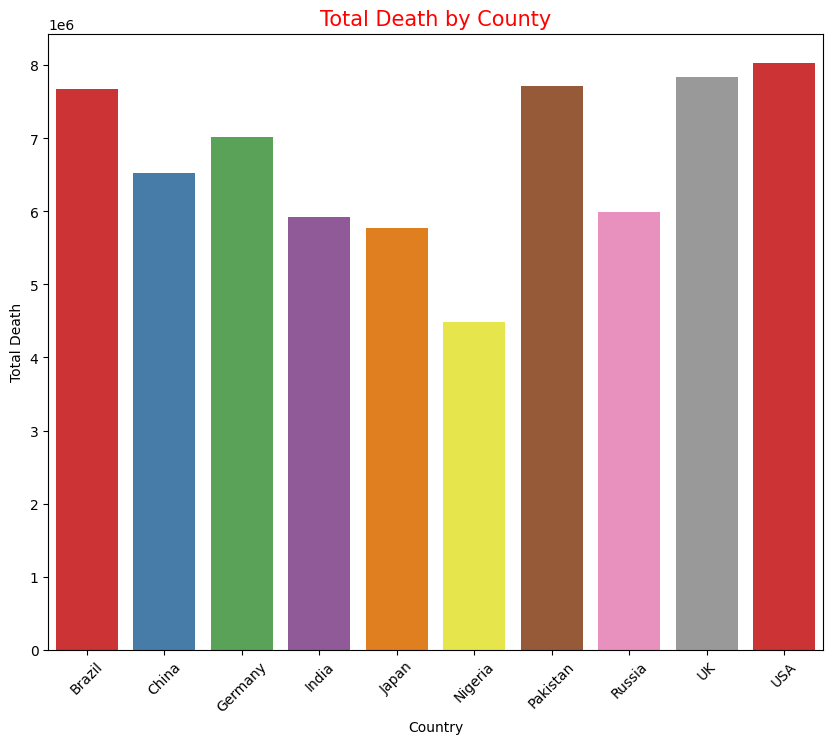

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x="Country",y="Number_of_Deaths",data=country_death,palette="Set1",hue="Country")
plt.title("Total Death by County",fontsize=15,color="red")
plt.xlabel("Country")
plt.ylabel("Total Death")
plt.xticks(rotation=45)
plt.show()

In [11]:
#Gender wise deaths by country

gen=data.groupby(["Country","Gender"])["Number_of_Deaths"].sum().reset_index()

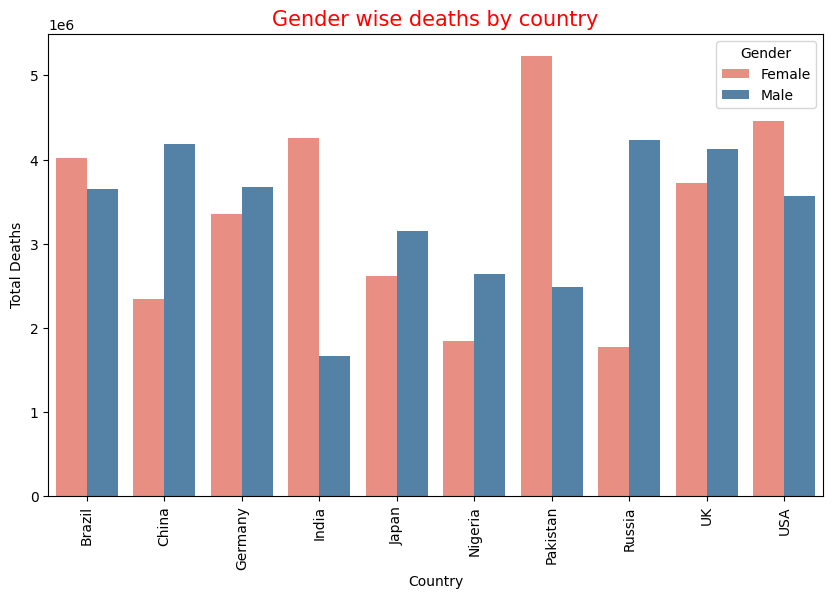

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x="Country",y="Number_of_Deaths",hue="Gender",data=gen,palette={"Male":"steelblue","Female":"salmon"})
plt.title("Gender wise deaths by country",fontsize=15,color="red")
plt.xlabel("Country")
plt.ylabel("Total Deaths")
plt.xticks(rotation=90)
plt.legend(title="Gender")
plt.show()

In [13]:
#year-wise mortality trend.

line=data.groupby("Year")["Mortality_Rate_per_1000"].mean().reset_index()

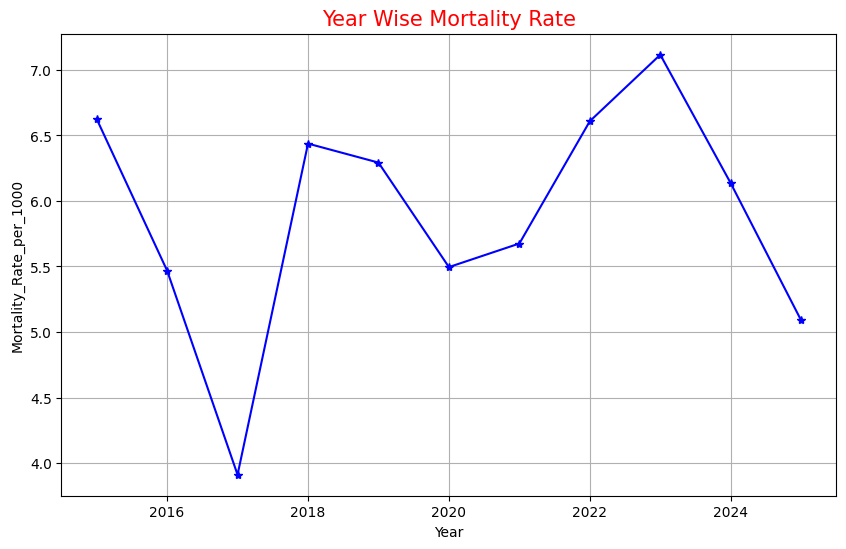

In [14]:
plt.figure(figsize=(10,6))
plt.plot(line["Year"],line["Mortality_Rate_per_1000"],marker="*",linestyle="-",color="b")
plt.xlabel("Year")
plt.ylabel("Mortality_Rate_per_1000")
plt.title("Year Wise Mortality Rate",fontsize=15,color="red")
plt.grid(True)
plt.show()

In [15]:
#Age group impact  bar

age=data.groupby("Age_Group")["Number_of_Deaths"].sum().reset_index()

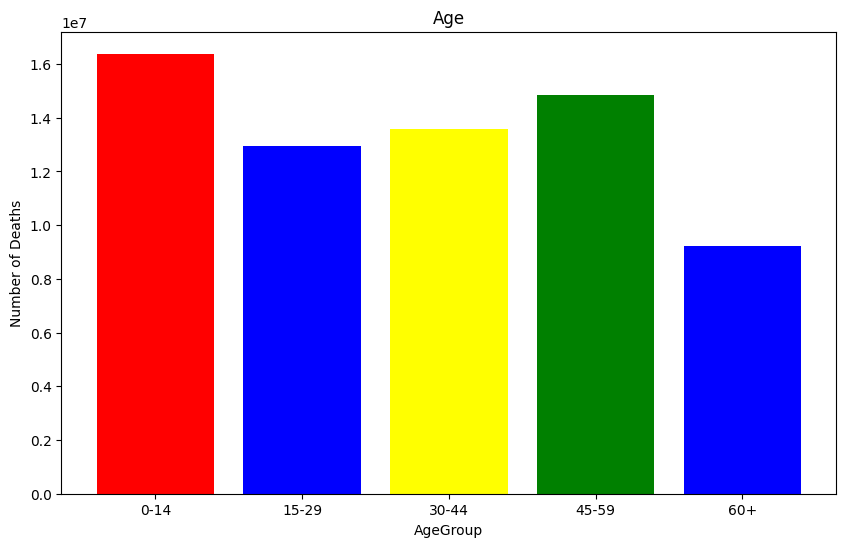

In [16]:
plt.figure(figsize=(10,6))
plt.bar(age["Age_Group"],age["Number_of_Deaths"],color=["red","blue","yellow","green","blue"])
plt.title("Age")
plt.xlabel("AgeGroup")
plt.ylabel("Number of Deaths")
plt.show()

In [17]:
#cause of death analysis  horixonta

data.groupby("Cause_of_Death")["Number_of_Deaths"].sum().reset_index()

,Cause_of_Death,Number_of_Deaths
0,Cancer,6454993
1,Cardiovascular Disease,6853516
2,Diabetes,4819227
3,Homicide,5329531
4,Infectious Diseases,4479349
5,Kidney Disease,6435091
6,Natural Disasters,5224390
7,Respiratory Disease,6627670
8,Road Accidents,8537062
9,Stroke,5655021


In [18]:
#country and cause of death

data.groupby(["Country","Cause_of_Death"])["Number_of_Deaths"].sum().reset_index()

,Country,Cause_of_Death,Number_of_Deaths
0,Brazil,Cancer,126707
1,Brazil,Cardiovascular Disease,142667
2,Brazil,Diabetes,318252
3,Brazil,Homicide,308190
4,Brazil,Infectious Diseases,598040
...,...,...,...
98,USA,Natural Disasters,793456
99,USA,Respiratory Disease,54683
100,USA,Road Accidents,1543375
101,USA,Stroke,1456406


**ML**

In [19]:
x=data[["Year","Country","Gender","Age_Group","Cause_of_Death"]]
y=data["Number_of_Deaths"]

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
cat=["Country","Gender","Age_Group","Cause_of_Death"]
num=["Year"]
preprocessor=ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown="ignore"),cat),
        ('num','passthrough',num)                                   #use the column as it is without any changes.
    ]
)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [25]:
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(n_estimators=200,random_state=42))

])

In [26]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'Gender',
                                                   'Age_Group',
                                                   'Cause_of_Death']),
                                                 ('num', 'passthrough',
                                                  ['Year'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [28]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

In [30]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

MAE: 131655.83126282052
RMSE: 158634.45138455476
R2 Score: -0.21069732661082918


In [31]:
data['Cause_of_Death']

,Cause_of_Death
0,Natural Disasters
1,Homicide
2,Infectious Diseases
3,Suicide
4,Stroke
...,...
255,Homicide
256,Cardiovascular Disease
257,Cancer
258,Suicide


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
sample = pd.DataFrame([{
    'Year': 2025,
    'Country': 'India',
    'Gender': 'Male',
    'Age_Group': '30-50',
    'Cause_of_Death': 'Cancer'
}])

model.predict(sample)

array([289825.87666667])